In [1]:
%load_ext autoreload
%autoreload 2

In [462]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [463]:
# import dataset
data_orig = pd.read_csv('../MA_PREDICTOR/data/ma_detailed_data_car.csv', parse_dates=['announcement_date'])
data_orig

,id,announcement_date,deal_value,acquiror_total_assets,acquiror_name,acquiror_ticker,target_name,target_nation,acquiror_nation,target_status,...,shares_acquired,consideration_offered,attitude,acquisition_technique,acquiror_financial_advisor,target_financial_advisor,purpose,acquiror_code,target_code,car
0,1631732020,2005-01-01,12.00,3160.41,Plains All American Pipeline LP,PAA,Shell Pipeline Co LP-Crude Oil Pipeline Assets...,United States,United States,Subsidiary,...,100.00,Cash|Cash Only,Friendly,Financial Acquiror|Divestiture,NaN,NaN,Strengthen existing operations/expand presence...,50102030,50103030,0.006854
1,1629274020,2005-01-04,153.67,6166.05,SuperValu Inc,SVU,Total Logistics Inc,United States,United States,Public,...,100.00,Cash Only|Cash,Friendly,Tender Offer|Tender Merger,Lazard,William Blair & Co,Strengthen existing operations/expand presence...,54301020,52405030,-0.009362
2,1631278020,2005-01-11,89.16,11127.95,Fulton Financial Corp,FULT,"SVB Financial Services Inc, Sommerville,New Je...",United States,United States,Public,...,100.00,Cash|Cash|Common Stock|Common Stock,Friendly,Stock Swap,NaN,Danielson Associates Inc,Expand presence in new/foreign markets,55101010,55101010,-0.011249
3,1631266040,2005-01-12,427.54,1116.90,Cleveland-Cliffs Inc,CLF,Portman Ltd,Australia,United States,Public,...,80.39,Cash|Cash,Friendly,Tender Offer,Wilson HTM|Fleet National Bank|Fifth Third Bank,Gresham Partners|Azure Capital,Strengthen existing operations/expand presence...,51201020,51201020,0.013061
4,1632176020,2005-01-14,16.00,1722.27,Thomas & Betts Corp,TNB,Southern Monopole & Utilities Co,United States,United States,Subsidiary,...,100.00,Cash|Cash Only,Friendly,Divestiture,NaN,NaN,Acquire competitors technology/strategic assets,52102030,51201020,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3325,3774828020,2021-07-19,625.00,5969.17,Bill.com Holdings Inc,BILL,Invoice2go Inc,United States,United States,Private,...,100.00,Cash|Common Stock,Friendly,Stock Swap,NaN,NaN,Strengthen operations,57201020,57201020,0.088395
3326,3778220020,2021-07-19,335.00,1240.31,Rapid7 Inc,RPD,Intsights Cyber Intelligence Ltd,United States,United States,Private,...,100.00,Common Stock|Cash,Friendly,Financial Acquiror,Foros,NaN,Strengthen operations,57201020,57201020,0.068755
3327,3777682020,2021-07-28,1450.00,6234.00,Avery Dennison Corp,AVY,Vestcom International Inc,United States,United States,Subsidiary,...,100.00,Cash|Cash Only,Friendly,Divestiture,Goldman Sachs & Co,RBC Capital Markets LLC|Jefferies LLC|Robert W...,"Create synergies, eliminate duplicate services...",51302020,53302010,0.022186
3328,3790420020,2021-08-05,280.00,1229.78,Insmed Inc,INSM,Motus Biosciences Inc,United States,United States,Private,...,100.00,Earnout|Common Stock|Cash,Friendly,Stock Swap,NaN,NaN,Strengthen operations,56202010,56202010,-0.150752


In [464]:
data_orig.columns

Index(['id', 'announcement_date', 'deal_value', 'acquiror_total_assets',
       'acquiror_name', 'acquiror_ticker', 'target_name', 'target_nation',
       'acquiror_nation', 'target_status', 'acquiror_industry',
       'target_industry', 'shares_at_announcement', 'shares_acquired',
       'consideration_offered', 'attitude', 'acquisition_technique',
       'acquiror_financial_advisor', 'target_financial_advisor', 'purpose',
       'acquiror_code', 'target_code', 'car'],
      dtype='object')

In [465]:
#df = pd.read_csv('/home/vlad/code/cobergmann/MA_PREDICTOR/MA_PREDICTOR/data/ma_detailed_data_car.csv')
#df

In [466]:
#data.loc[data['acquiror_name'] == 'Occidental Petroleum Corp']

# Investigation

In [467]:
# Defining which columns should be considered in detailed investigations
columns_to_inspect = [
    'deal_value',
    'acquiror_total_assets',
    'acquiror_name',
    'target_name',
    'acquiror_industry',
    'target_industry',
    'shares_acquired',
    'acquisition_technique',
    'purpose',
    'car',
    'announcement_date',
    'consideration_offered',
    'positive_car',
    'attitude',
    'target_status',
    'target_nation'
]

In [468]:
# Removing outliers
data = data_orig[(data_orig.car > -0.3) & (data_orig.car < 0.3)]

In [469]:
data['positive_car'] = data.car.apply(lambda elem: 'yes' if elem > 0 else 'no')
data

/tmp/ipykernel_29559/521159735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['positive_car'] = data.car.apply(lambda elem: 'yes' if elem > 0 else 'no')


,id,announcement_date,deal_value,acquiror_total_assets,acquiror_name,acquiror_ticker,target_name,target_nation,acquiror_nation,target_status,...,consideration_offered,attitude,acquisition_technique,acquiror_financial_advisor,target_financial_advisor,purpose,acquiror_code,target_code,car,positive_car
0,1631732020,2005-01-01,12.00,3160.41,Plains All American Pipeline LP,PAA,Shell Pipeline Co LP-Crude Oil Pipeline Assets...,United States,United States,Subsidiary,...,Cash|Cash Only,Friendly,Financial Acquiror|Divestiture,NaN,NaN,Strengthen existing operations/expand presence...,50102030,50103030,0.006854,yes
1,1629274020,2005-01-04,153.67,6166.05,SuperValu Inc,SVU,Total Logistics Inc,United States,United States,Public,...,Cash Only|Cash,Friendly,Tender Offer|Tender Merger,Lazard,William Blair & Co,Strengthen existing operations/expand presence...,54301020,52405030,-0.009362,no
2,1631278020,2005-01-11,89.16,11127.95,Fulton Financial Corp,FULT,"SVB Financial Services Inc, Sommerville,New Je...",United States,United States,Public,...,Cash|Cash|Common Stock|Common Stock,Friendly,Stock Swap,NaN,Danielson Associates Inc,Expand presence in new/foreign markets,55101010,55101010,-0.011249,no
3,1631266040,2005-01-12,427.54,1116.90,Cleveland-Cliffs Inc,CLF,Portman Ltd,Australia,United States,Public,...,Cash|Cash,Friendly,Tender Offer,Wilson HTM|Fleet National Bank|Fifth Third Bank,Gresham Partners|Azure Capital,Strengthen existing operations/expand presence...,51201020,51201020,0.013061,yes
4,1632176020,2005-01-14,16.00,1722.27,Thomas & Betts Corp,TNB,Southern Monopole & Utilities Co,United States,United States,Subsidiary,...,Cash|Cash Only,Friendly,Divestiture,NaN,NaN,Acquire competitors technology/strategic assets,52102030,51201020,0.000000,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3325,3774828020,2021-07-19,625.00,5969.17,Bill.com Holdings Inc,BILL,Invoice2go Inc,United States,United States,Private,...,Cash|Common Stock,Friendly,Stock Swap,NaN,NaN,Strengthen operations,57201020,57201020,0.088395,yes
3326,3778220020,2021-07-19,335.00,1240.31,Rapid7 Inc,RPD,Intsights Cyber Intelligence Ltd,United States,United States,Private,...,Common Stock|Cash,Friendly,Financial Acquiror,Foros,NaN,Strengthen operations,57201020,57201020,0.068755,yes
3327,3777682020,2021-07-28,1450.00,6234.00,Avery Dennison Corp,AVY,Vestcom International Inc,United States,United States,Subsidiary,...,Cash|Cash Only,Friendly,Divestiture,Goldman Sachs & Co,RBC Capital Markets LLC|Jefferies LLC|Robert W...,"Create synergies, eliminate duplicate services...",51302020,53302010,0.022186,yes
3328,3790420020,2021-08-05,280.00,1229.78,Insmed Inc,INSM,Motus Biosciences Inc,United States,United States,Private,...,Earnout|Common Stock|Cash,Friendly,Stock Swap,NaN,NaN,Strengthen operations,56202010,56202010,-0.150752,no


In [470]:
# Creating new dataframe for investigation
technique = data[['car']]

In [471]:
#sns.catplot(data=df_tmp, x='maj', y='car', kind='box', showfliers=False)

In [436]:
#sns.catplot(data=df_tmp, x='maj', y='car', kind='box', showfliers=False)

In [700]:
# Cluster_change_in_public_status:
'''
Reverse Takeover - Observations: 47, Positive Car: 25, Negative Car: 22; 
Acquiror Is An Investor Group(SPAC) - Observations: 1, Positive Car: 1;
Privatization - Observations: 11, Positive Car: 7, Negative Car: 4; 
Private Tender Offer - Observations: 1, Negative Car: 1;
Privately Negotiated Purchase - Observations: 116, Positive Car: 60, Negative Car: 56;
Secondary Buyout - Observations: 2, Negative Car: 2;
Going Private - Observations: 14, Positive Car: 5, Negative Car: 9;
Reverse LBO - Observations: , Positive Car: , Negative Car: ;
'''

# Cluster_swapping_assets:
'''
Mergerof Equals - Observations: 22, Positive Car: 9, Negative Car: 12;
Collar - Observations: 45, Positive Car: 22, Negative Car: 23;
Joint Venture - Observations: 17, Positive Car: 5, Negative Car: 12;
Reverse Morris Trust - Observations: 11, Positive Car: 4, Negative Car: 7;
Sale and Leaseback - Observations: 16, Positive Car: 7, Negative Car: 9;
Property Acquisition Flag - Observations: 135, Positive Car: 64, Negative Car: 71;
Concession - Observations: 1, Positive Car: 1;
'''

# Cluster_divestiture:
'''
Institutional Buyout - Observations: 100, Positive Car: 45, Negative Car: 55;
Leveraged Buyout - Observations: 100, Positive Car: 45, Negative Car: 55;
Divestiture - Observations: 1871, Positive Car: 1029, Negative Car: 842;
Tender Merger - Observations: 131, Positive Car: 71, Negative Car: 60;
Tender Offer - Observations: 162, Positive Car: 88, Negative Car: 74;
Open Market Purchase - Observations: 3, Positive Car: 1, Negative Car: 2;
Financial Acquiror - Observations: 617, Positive Car: 323, Negative Car: 294;
Debt Restructuring - Observations: 2, Negative Car: 2;
Internal Reorganization - Observations: 14, Positive Car: 4, Negative Car: 10;
Three Way Merger - Observations: 4, Positive Car: 3, Negative Car: 1;
Rumored Deal - Observations: 352, Positive Car: 180, Negative Car: 172;
'''

# Cluster_miscellaneous:
'''
Litigation - Observations: 2, Positive Car: 1, Negative Car: 1;
Acquiror Includes Management - Observations: 2, Positive Car: 1, Negative Car: 1;
Acquiror Is A White Knight - Observations: 3, Positive Car: 1, Negative Car: 2;
Schemeof Arrangement - Observations: 57, Positive Car: 21, Negative Car: 36;
Mandatory Offering - Observations: 4, Positive Car: 1, Negative Car: 3;
Proxy Fight - Observations: 4, Positive Car: 2, Negative Car: 2;
Unsolicited Deal - Observations: 33, Positive Car: 18, Negative Car: 15;
'''

# Cluster_bankruptcy:
'''
Bankruptcy Acquisition - Observations: 32, Positive Car: 18, Negative Car: 14;
Restructuring - Observations: 28, Positive Car: 15, Negative Car: 13;
Auction - Observations: 34, Positive Car: 19, Negative Car: 15;
'''

'\nBankruptcy Acquisition - Observations: 32, Positive Car: 18, Negative Car: 14;\nRestructuring - Observations: 28, Positive Car: 15, Negative Car: 13;\nAuction - Observations: 34, Positive Car: 19, Negative Car: 15;\n'

In [701]:
# Cluster_change_in_public_status:
'''
Reverse Takeover
Acquiror Is An Investor Group(SPAC)
Privatization
Private Tender Offer
Privately Negotiated Purchase
Secondary Buyout
Going Private
'''

# Cluster_swapping_assets:
'''
Mandatory Offering
Mergerof Equals
Collar
Joint Venture
Reverse Morris Trust
Sale and Leaseback
Property Acquisition Flag
Concession
'''

# Cluster_divestiture:
'''
Institutional Buyout
Leveraged Buyout
Divestiture
Tender Merger
Tender Offer
Open Market Purchase
Financial Acquiror
Debt Restructuring
Internal Reorganization
Three Way Merger
Rumored Deal
Schemeof Arrangement
Unsolicited Deal
'''

# Cluster_possible_hostile:
'''
Litigation
Acquiror Includes Management
Acquiror Is A White Knight
Proxy Fight
'''

# Cluster_bankruptcy:
'''
Bankruptcy Acquisition
Restructuring
Auction
'''

'\nBankruptcy Acquisition\nRestructuring\nAuction\n'

In [792]:
def get_cluster(technique):
    cluster_dict = {
        'private_companies': ['Reverse Takeover',
                              'Acquiror Is An Investor Group',
                              'Privatization',
                              'Private Tender Offer',
                              'Privately Negotiated Purchase',
                              'Secondary Buyout', 
                              'Going Private',
                              0,
                              0,
                              0,
                              0,
                              0,
                              0],
        'asset_driven_op': ['Mandatory Offering',
                            'Mergerof Equals',
                            'Collar',
                            'Joint Venture', 
                            'Reverse Morris Trust',
                            'Sale and Leaseback',
                            'Property Acquisition Flag',
                            'Concession',
                            'Asset Swap',
                            'Stock Swap',
                            0,
                            0,
                            0],
        'divestiture': ['Divestiture', 
                        'Institutional Buyout', 
                        'Leveraged Buyout',
                        'Tender Merger',
                        'Tender Offer', 
                        'Open Market Purchase',
                        'Financial Acquiror', 
                        'Debt Restructuring', 
                        'Internal Reorganization',
                        'Three Way Merger',
                        'Rumored Deal',
                        'Schemeof Arrangement',
                        'Unsolicited Deal'],
        'possible_problematic': ['Litigation',
                                 'Acquiror Includes Management',
                                 'Acquiror Is A White Knight',
                                 'Proxy Fight',
                                 0,
                                 0,
                                 0,
                                 0,
                                 0,
                                 0,
                                 0,
                                 0,
                                 0],
        'bankruptcy': ['Bankruptcy Acquisition',
                       'Restructuring',
                       'Auction',
                       0,
                       0,
                       0,
                       0,
                       0,
                       0,
                       0,
                       0,
                       0,
                       0,]
                                 
    }
    #cluster_df = pd.DataFrame(cluster_dict)
    for k, v in cluster_dict.items():
        if technique in v:
            return k

data_1 = data_clean.copy()
data_1['cluster_category'] = data_clean['acquisition_technique_clean'].apply(get_cluster)
    

    
    
get_cluster("Leveraged Buyout")    
    
    #if "Auction" in cluster_df.to_numpy():
        #return True
    
#print(get_cluster(1))

'divestiture'

In [793]:
test = "Financial Acquiror|Divestiture"

In [794]:
test[:test.find("|")]

'Financial Acquiror'

In [795]:
data_clean = data.copy()

In [796]:
data_clean["acquisition_technique_clean"] = data_clean["acquisition_technique"].apply(lambda x: x[:x.find("|")] if "|" in x else x)

In [797]:
data_clean[["acquisition_technique", "acquisition_technique_clean"]]

,acquisition_technique,acquisition_technique_clean
0,Financial Acquiror|Divestiture,Financial Acquiror
1,Tender Offer|Tender Merger,Tender Offer
2,Stock Swap,Stock Swap
3,Tender Offer,Tender Offer
4,Divestiture,Divestiture
...,...,...
3325,Stock Swap,Stock Swap
3326,Financial Acquiror,Financial Acquiror
3327,Divestiture,Divestiture
3328,Stock Swap,Stock Swap


In [798]:
data

,id,announcement_date,deal_value,acquiror_total_assets,acquiror_name,acquiror_ticker,target_name,target_nation,acquiror_nation,target_status,...,consideration_offered,attitude,acquisition_technique,acquiror_financial_advisor,target_financial_advisor,purpose,acquiror_code,target_code,car,positive_car
0,1631732020,2005-01-01,12.00,3160.41,Plains All American Pipeline LP,PAA,Shell Pipeline Co LP-Crude Oil Pipeline Assets...,United States,United States,Subsidiary,...,Cash|Cash Only,Friendly,Financial Acquiror|Divestiture,NaN,NaN,Strengthen existing operations/expand presence...,50102030,50103030,0.006854,yes
1,1629274020,2005-01-04,153.67,6166.05,SuperValu Inc,SVU,Total Logistics Inc,United States,United States,Public,...,Cash Only|Cash,Friendly,Tender Offer|Tender Merger,Lazard,William Blair & Co,Strengthen existing operations/expand presence...,54301020,52405030,-0.009362,no
2,1631278020,2005-01-11,89.16,11127.95,Fulton Financial Corp,FULT,"SVB Financial Services Inc, Sommerville,New Je...",United States,United States,Public,...,Cash|Cash|Common Stock|Common Stock,Friendly,Stock Swap,NaN,Danielson Associates Inc,Expand presence in new/foreign markets,55101010,55101010,-0.011249,no
3,1631266040,2005-01-12,427.54,1116.90,Cleveland-Cliffs Inc,CLF,Portman Ltd,Australia,United States,Public,...,Cash|Cash,Friendly,Tender Offer,Wilson HTM|Fleet National Bank|Fifth Third Bank,Gresham Partners|Azure Capital,Strengthen existing operations/expand presence...,51201020,51201020,0.013061,yes
4,1632176020,2005-01-14,16.00,1722.27,Thomas & Betts Corp,TNB,Southern Monopole & Utilities Co,United States,United States,Subsidiary,...,Cash|Cash Only,Friendly,Divestiture,NaN,NaN,Acquire competitors technology/strategic assets,52102030,51201020,0.000000,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3325,3774828020,2021-07-19,625.00,5969.17,Bill.com Holdings Inc,BILL,Invoice2go Inc,United States,United States,Private,...,Cash|Common Stock,Friendly,Stock Swap,NaN,NaN,Strengthen operations,57201020,57201020,0.088395,yes
3326,3778220020,2021-07-19,335.00,1240.31,Rapid7 Inc,RPD,Intsights Cyber Intelligence Ltd,United States,United States,Private,...,Common Stock|Cash,Friendly,Financial Acquiror,Foros,NaN,Strengthen operations,57201020,57201020,0.068755,yes
3327,3777682020,2021-07-28,1450.00,6234.00,Avery Dennison Corp,AVY,Vestcom International Inc,United States,United States,Subsidiary,...,Cash|Cash Only,Friendly,Divestiture,Goldman Sachs & Co,RBC Capital Markets LLC|Jefferies LLC|Robert W...,"Create synergies, eliminate duplicate services...",51302020,53302010,0.022186,yes
3328,3790420020,2021-08-05,280.00,1229.78,Insmed Inc,INSM,Motus Biosciences Inc,United States,United States,Private,...,Earnout|Common Stock|Cash,Friendly,Stock Swap,NaN,NaN,Strengthen operations,56202010,56202010,-0.150752,no


In [799]:
data_1

,id,announcement_date,deal_value,acquiror_total_assets,acquiror_name,acquiror_ticker,target_name,target_nation,acquiror_nation,target_status,...,acquisition_technique,acquiror_financial_advisor,target_financial_advisor,purpose,acquiror_code,target_code,car,positive_car,acquisition_technique_clean,cluster_category
0,1631732020,2005-01-01,12.00,3160.41,Plains All American Pipeline LP,PAA,Shell Pipeline Co LP-Crude Oil Pipeline Assets...,United States,United States,Subsidiary,...,Financial Acquiror|Divestiture,NaN,NaN,Strengthen existing operations/expand presence...,50102030,50103030,0.006854,yes,Financial Acquiror,divestiture
1,1629274020,2005-01-04,153.67,6166.05,SuperValu Inc,SVU,Total Logistics Inc,United States,United States,Public,...,Tender Offer|Tender Merger,Lazard,William Blair & Co,Strengthen existing operations/expand presence...,54301020,52405030,-0.009362,no,Tender Offer,divestiture
2,1631278020,2005-01-11,89.16,11127.95,Fulton Financial Corp,FULT,"SVB Financial Services Inc, Sommerville,New Je...",United States,United States,Public,...,Stock Swap,NaN,Danielson Associates Inc,Expand presence in new/foreign markets,55101010,55101010,-0.011249,no,Stock Swap,asset_driven_op
3,1631266040,2005-01-12,427.54,1116.90,Cleveland-Cliffs Inc,CLF,Portman Ltd,Australia,United States,Public,...,Tender Offer,Wilson HTM|Fleet National Bank|Fifth Third Bank,Gresham Partners|Azure Capital,Strengthen existing operations/expand presence...,51201020,51201020,0.013061,yes,Tender Offer,divestiture
4,1632176020,2005-01-14,16.00,1722.27,Thomas & Betts Corp,TNB,Southern Monopole & Utilities Co,United States,United States,Subsidiary,...,Divestiture,NaN,NaN,Acquire competitors technology/strategic assets,52102030,51201020,0.000000,no,Divestiture,divestiture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3325,3774828020,2021-07-19,625.00,5969.17,Bill.com Holdings Inc,BILL,Invoice2go Inc,United States,United States,Private,...,Stock Swap,NaN,NaN,Strengthen operations,57201020,57201020,0.088395,yes,Stock Swap,asset_driven_op
3326,3778220020,2021-07-19,335.00,1240.31,Rapid7 Inc,RPD,Intsights Cyber Intelligence Ltd,United States,United States,Private,...,Financial Acquiror,Foros,NaN,Strengthen operations,57201020,57201020,0.068755,yes,Financial Acquiror,divestiture
3327,3777682020,2021-07-28,1450.00,6234.00,Avery Dennison Corp,AVY,Vestcom International Inc,United States,United States,Subsidiary,...,Divestiture,Goldman Sachs & Co,RBC Capital Markets LLC|Jefferies LLC|Robert W...,"Create synergies, eliminate duplicate services...",51302020,53302010,0.022186,yes,Divestiture,divestiture
3328,3790420020,2021-08-05,280.00,1229.78,Insmed Inc,INSM,Motus Biosciences Inc,United States,United States,Private,...,Stock Swap,NaN,NaN,Strengthen operations,56202010,56202010,-0.150752,no,Stock Swap,asset_driven_op


In [800]:
data_1[(data_1["cluster_category"].isna())]["acquisition_technique_clean"].value_counts()

    2
Name: acquisition_technique_clean, dtype: int64

In [801]:
data_1[(data_1["cluster_category"] != "divestiture") & (~data_1["cluster_category"].isna())]

,id,announcement_date,deal_value,acquiror_total_assets,acquiror_name,acquiror_ticker,target_name,target_nation,acquiror_nation,target_status,...,acquisition_technique,acquiror_financial_advisor,target_financial_advisor,purpose,acquiror_code,target_code,car,positive_car,acquisition_technique_clean,cluster_category
2,1631278020,2005-01-11,89.16,11127.95,Fulton Financial Corp,FULT,"SVB Financial Services Inc, Sommerville,New Je...",United States,United States,Public,...,Stock Swap,NaN,Danielson Associates Inc,Expand presence in new/foreign markets,55101010,55101010,-0.011249,no,Stock Swap,asset_driven_op
5,1632555020,2005-01-18,232.22,15834.52,Colonial BancGroup Inc,CNB,"FFLC Bancorp Inc,Leesburg, Florida",United States,United States,Public,...,Stock Swap,Lehman Brothers,Keefe Bruyette & Woods Inc,"Create synergies, eliminate duplicate services...",55101010,55101010,0.066480,yes,Stock Swap,asset_driven_op
6,1634502020,2005-01-26,2211.08,1105.45,Cimarex Energy Co,XEC,Magnum Hunter Resources Inc,United States,United States,Public,...,Stock Swap,Petrie Parkman & Co Inc|Lehman Brothers,Deutsche Bank Securities|Merrill Lynch,Strengthen existing operations/expand presence...,50102020,50102020,-0.093760,no,Stock Swap,asset_driven_op
8,1634798040,2005-01-26,8.50,872.87,Photronics Inc,PLAB,PKL Co Ltd,South Korea,United States,Public,...,Privately Negotiated Purchase,NaN,NaN,Acquire competitors technology/strategic assets,52102010,57101010,0.024273,yes,Privately Negotiated Purchase,private_companies
9,1635132020,2005-01-28,54906.81,63032.00,Procter & Gamble Co,PG,Gillette Co,United States,United States,Public,...,Stock Swap,Merrill Lynch,UBS Investment Bank|Goldman Sachs & Co,"Create synergies, eliminate duplicate services...",54201010,54201020,-0.046457,no,Stock Swap,asset_driven_op
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3315,3748902020,2021-06-02,3050.81,5247.00,Southwestern Energy Co,SWN,Indigo Natural Resources LLC,United States,United States,Private,...,Stock Swap,Goldman Sachs & Co,Credit Suisse Securities (USA),Increase shareholder value|Strengthen operatio...,50102020,50102020,0.087774,yes,Stock Swap,asset_driven_op
3316,3751055020,2021-06-07,1998.18,1106.12,1Life Healthcare Inc,ONEM,Iora Health Inc,United States,United States,Private,...,Stock Swap|Financial Acquiror,Morgan Stanley & Co LLC,Credit Suisse,"Create synergies, eliminate duplicate services...",56102010,56102010,-0.057847,no,Stock Swap,asset_driven_op
3323,3776157020,2021-07-12,35.19,839.86,Select Energy Services Inc,WTTR,Complete Energy Services Inc,United States,United States,Private,...,Stock Swap,NaN,NaN,Expand presence in new/foreign markets,50103020,59101010,0.000000,no,Stock Swap,asset_driven_op
3325,3774828020,2021-07-19,625.00,5969.17,Bill.com Holdings Inc,BILL,Invoice2go Inc,United States,United States,Private,...,Stock Swap,NaN,NaN,Strengthen operations,57201020,57201020,0.088395,yes,Stock Swap,asset_driven_op


In [802]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3297 entries, 0 to 3329
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           3297 non-null   int64         
 1   announcement_date            3297 non-null   datetime64[ns]
 2   deal_value                   3297 non-null   float64       
 3   acquiror_total_assets        3297 non-null   float64       
 4   acquiror_name                3297 non-null   object        
 5   acquiror_ticker              3297 non-null   object        
 6   target_name                  3297 non-null   object        
 7   target_nation                3297 non-null   object        
 8   acquiror_nation              3297 non-null   object        
 9   target_status                3297 non-null   object        
 10  acquiror_industry            3297 non-null   object        
 11  target_industry              3297 non-null 

In [803]:
data[data["acquisition_technique"] == "Reverse Takeover"]

,id,announcement_date,deal_value,acquiror_total_assets,acquiror_name,acquiror_ticker,target_name,target_nation,acquiror_nation,target_status,...,consideration_offered,attitude,acquisition_technique,acquiror_financial_advisor,target_financial_advisor,purpose,acquiror_code,target_code,car,positive_car


In [804]:
# unpack techniques and put them into set
techniques = set()
for index, row in data.iterrows():
    for technique in row.acquisition_technique.split('|'):
        if technique:
            techniques.add(technique)
techniques

{'Acquiror Includes Management',
 'Acquiror Is A White Knight',
 'Acquiror Is An Investor Group',
 'Asset Swap',
 'Auction',
 'Bankruptcy Acquisition',
 'Collar',
 'Concession',
 'Debt Restructuring',
 'Divestiture',
 'Financial Acquiror',
 'Going Private',
 'Institutional Buyout',
 'Internal Reorganization',
 'Joint Venture',
 'Leveraged Buyout',
 'Litigation',
 'Mandatory Offering',
 'Mergerof Equals',
 'Open Market Purchase',
 'Private Tender Offer',
 'Privately Negotiated Purchase',
 'Privatization',
 'Property Acquisition Flag',
 'Proxy Fight',
 'Restructuring',
 'Reverse Morris Trust',
 'Reverse Takeover',
 'Rumored Deal',
 'Sale and Leaseback',
 'Schemeof Arrangement',
 'Secondary Buyout',
 'Stock Swap',
 'Tender Merger',
 'Tender Offer',
 'Three Way Merger',
 'Unsolicited Deal'}

In [441]:
len(techniques)

37

In [442]:
# Money Grab if name of acquirer is similar to name of target

#Tender Offer
#Open Market Purchase

In [692]:
# Further investigation into 'Divestiture' and 'Stock Swap'
investigation = data.copy()

# Transforming pipes into lists of techniques used
list_gen = lambda x: x.split('|')
investigation['acquisition_technique'] = investigation.acquisition_technique.apply(list_gen)

# Cluster considerations
def fishy(techniques):
    
    # Define fishy techniques
    fishy_techniques = [
        'Auction'
    ]
    
    # Label fishy techniques
    for technique in techniques:
        if technique in fishy_techniques:
            return 'fishy'
    return 'ok'

# Apply detector
investigation['red_flag'] = investigation.apply(lambda row: fishy(row.acquisition_technique), axis=1)

# Counting number of occurences
investigation.red_flag.value_counts()

ok       3263
fishy      34
Name: red_flag, dtype: int64

In [693]:
# Filtering out fishy deals
test = investigation[investigation.red_flag == 'fishy'][columns_to_inspect]
test
#test_1 = test[test.purpose == 'Increase shareholder value']
#test_1

,deal_value,acquiror_total_assets,acquiror_name,target_name,acquiror_industry,target_industry,shares_acquired,acquisition_technique,purpose,car,announcement_date,consideration_offered,positive_car,attitude,target_status,target_nation
747,769.07,1504.38,CIENA Corp,Nortel Networks Corp- Ethernet Business,Communications & Networking,Communications & Networking,100.0,"[Auction, Bankruptcy Acquisition, Divestiture,...",Allow to offer new products and services|Stren...,0.041636,2009-10-07,Cash|Common Stock|Cash|Convertible Note,yes,Friendly,Subsidiary,Canada
764,975.00,1865.86,Scripps Networks Interactive Inc,The Travel Channel LLC,Broadcasting,Broadcasting,65.0,"[Joint Venture, Auction, Rumored Deal, Divesti...",Expand presence in new/foreign markets,-0.027947,2009-11-05,Cash|Cash Only,no,Friendly,Subsidiary,United States
892,126.10,2388.38,Sunstone Hotel Investors Inc,Royal Palm Resort Hotel,"Real Estate Rental, Development & Operations","Hotels, Motels & Cruise Lines",100.0,[Auction],Strengthen operations,-0.026782,2010-08-16,Cash Only|Cash,no,Friendly,Private,United States
918,1270.00,2615.96,TransDigm Group Inc,McKechnie Aerospace,Aerospace & Defense,Aerospace & Defense,100.0,"[Auction, Divestiture, Rumored Deal]","Create synergies, eliminate duplicate services...",-0.008776,2010-09-27,Cash Only|Cash,no,Friendly,Subsidiary,United States
920,185.00,12787.70,Boston Properties Inc,"Bay Colony Corporate Center, Waltham,Massachus...",Commercial REITs,"Real Estate Rental, Development & Operations",100.0,[Auction],Strengthen operations,-0.002600,2010-09-27,Cash|Liabilities,no,Friendly,Private,United States
1002,10.25,4462.88,Penn National Gaming Inc,Rosecroft Raceway,Casinos & Gaming,Casinos & Gaming,100.0,"[Auction, Divestiture, Bankruptcy Acquisition]",Acquire competitors technology/strategic assets,-0.024979,2011-01-29,Cash Only|Cash,no,Friendly,Subsidiary,United States
1009,740.00,8520.63,Quest Diagnostics Inc,Athena Diagnostics Inc,Biotechnology & Medical Research,Pharmaceuticals,100.0,"[Rumored Deal, Divestiture, Auction]",Concentrate on core businesses/assets|Create s...,0.005122,2011-02-24,Cash|Cash Only,yes,Friendly,Subsidiary,United States
1046,195.00,222.20,Chatham Lodging Trust,Innkeepers USA Trust-Hotels(5),Specialized REITs,"Hotels, Motels & Cruise Lines",100.0,"[Restructuring, Auction, Divestiture, Bankrupt...",Proceeds used to pay down existing outstanding...,-0.022915,2011-05-03,Cash Only|Cash,no,Friendly,Subsidiary,United States
1079,8875.93,199300.00,Capital One Financial Corp,ING Direct USA,Banks,Business Support Services,100.0,"[Financial Acquiror, Auction, Divestiture]","Create synergies, eliminate duplicate services...",0.021410,2011-06-16,Common Stock|Cash,yes,Friendly,Subsidiary,United States
1185,455.00,1378.95,Medicis Pharmaceutical Corp,Graceway Pharmaceuticals Inc,Pharmaceuticals,Pharmaceuticals,100.0,"[Restructuring, Bankruptcy Acquisition, Divest...",Expand presence in new/foreign markets|Strengt...,-0.014726,2011-11-18,Cash|Cash Only,no,Friendly,Subsidiary,United States


In [694]:
#sns.catplot(data=, x='acquisition_technique', y='car', kind='box', showfliers=False)

In [695]:
test.shape

(34, 16)

In [696]:
data['car'].mean()

0.004215917692471853

In [697]:
test.acquiror_industry.value_counts()

Real Estate Rental, Development & Operations      3
Aerospace & Defense                               3
Investment Management & Fund Operators            3
Banks                                             3
Electrical Components & Equipment                 2
Healthcare Facilities & Services                  2
Auto, Truck & Motorcycle Parts                    1
Medical Equipment, Supplies & Distribution        1
Property & Casualty Insurance                     1
Wireless Telecommunications Services              1
Textiles & Leather Goods                          1
Specialty Chemicals                               1
IT Services & Consulting                          1
Communications & Networking                       1
Home Improvement Products & Services Retailers    1
Broadcasting                                      1
Appliances, Tools & Housewares                    1
Apparel & Accessories                             1
Pharmaceuticals                                   1
Specialized 

In [698]:
test['positive_car'].value_counts()

yes    19
no     15
Name: positive_car, dtype: int64

In [699]:
test.attitude.value_counts()

Friendly    34
Name: attitude, dtype: int64

In [480]:
#sns.catplot(data=df_tmp, x='maj', y='car', kind='box', showfliers=False)

In [812]:
data_divestiture = data_1[data_1['cluster_category'] == 'divestiture']

In [ ]:
#sns.displot(data_divestiture, x="")

<AxesSubplot:xlabel='cluster_category'>

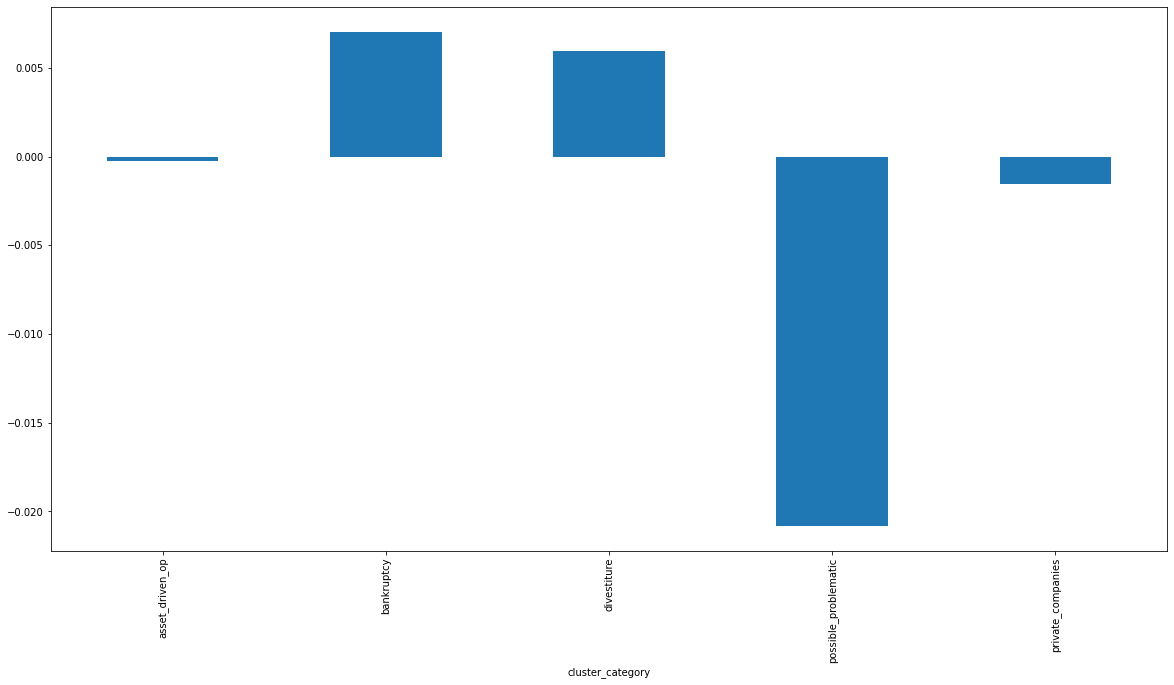

In [817]:
plt.figure(figsize=(20, 10))
data_1.groupby('cluster_category')['car'].mean().plot(kind='bar')

<AxesSubplot:xlabel='cluster_category'>

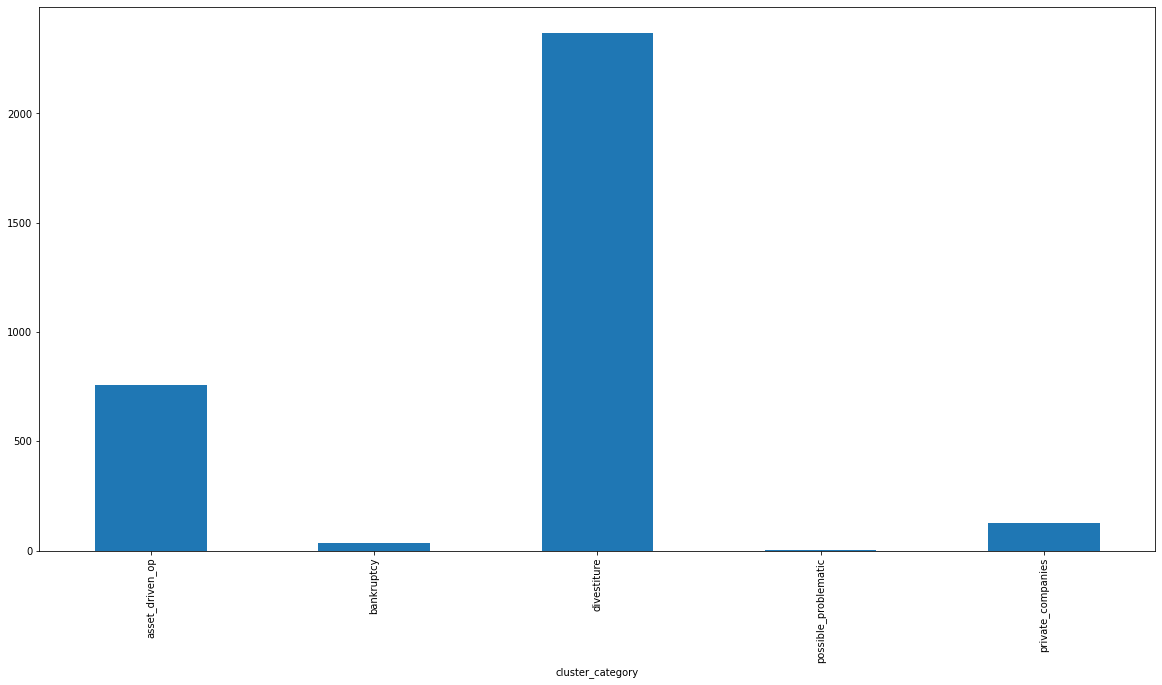

In [819]:
plt.figure(figsize=(20, 10))
data_1.groupby('cluster_category')['id'].count().plot(kind='bar')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'divestiture'),
  Text(1, 0, 'asset_driven_op'),
  Text(2, 0, 'private_companies'),
  Text(3, 0, 'bankruptcy'),
  Text(4, 0, 'possible_problematic')])

<Figure size 1800x720 with 0 Axes>

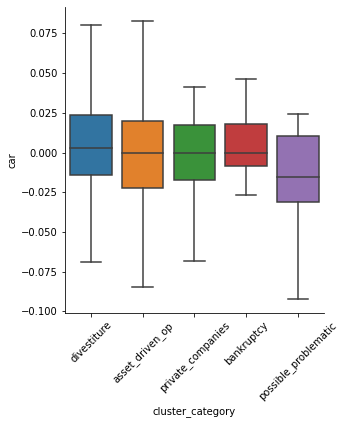

In [822]:
plt.figure(figsize=(25, 10))
sns.catplot(data=data_1, x='cluster_category', y='car', kind='box', showfliers=False)
plt.xticks(rotation=45)

In [ ]:
plt.xticks(rotation=45)

In [ ]:
#df['acquisition_technique'].value_counts()

#df.columns

#df['car'].sort_values(ascending=False).head(5)

# Data Exploration

## Data seasonality

Looking at the performance of CAR by year and month

In [ ]:
import datetime as dt

In [ ]:
df['announcement_date'] = pd.to_datetime(df['announcement_date'])

In [ ]:
df['announcement_date'].dtype

In [ ]:
df['year'] = df['announcement_date'].dt.year
df

In [ ]:
# Looking at the volume of mergers by year

plt.figure(figsize=(15, 5))
df.groupby('year')['id'].count().plot()

In [ ]:
# Looking at the performance of mergers by year

plt.figure(figsize=(15, 5))
df.groupby('year')['car'].mean().plot()

In [ ]:
df['month'] = df['announcement_date'].dt.month
df.head()

In [ ]:
df.groupby('month')['id'].count()

In [ ]:
plt.figure(figsize=(15, 5))
df.groupby('month')['id'].count().plot()

In [ ]:
plt.figure(figsize=(15, 5))
df.groupby('month')['car'].mean().plot()

## Details on merges

Looking at companies that performed an internal merger  

In [ ]:
# Filtering the dataset to see how many companies perfermormed an internal merger

df_filter = df.loc[df['acquiror_name'] == df['target_name']]
df_filter

In [ ]:
df_filter.isna().sum()

In [ ]:
df_filter.columns

Looking at the CAR values in the internal mergers

In [ ]:
df_filter['acquiror_name'].value_counts()

In [ ]:
(df.shares_acquired == 100).apply(int)

In [ ]:
df_tmp = df.copy()
df_tmp['tot'] = (df.shares_acquired == 100).apply(int)
df_tmp['maj'] = (df.shares_acquired > 50).apply(int)
df_tmp['self'] = (df['acquiror_name'] == df['target_name']).apply(int)

In [ ]:
sns.catplot(data=df_tmp, x='self', y='car', kind='box', showfliers=False)

In [ ]:
sns.catplot(data=df_tmp, x='maj', y='car', kind='box', showfliers=False)

In [ ]:
sns.catplot(data=df_tmp, x='tot', y='car', kind='box', showfliers=False)

In [ ]:
performance_acquiror = df_filter.groupby('acquiror_name')['car']
performance_acquiror

In [ ]:
plt.figure(figsize=(15, 50))
#df_filter.groupby('acquiror_name')['car'].mean().plot()
sns.barplot(data=df_filter,x='car', y='acquiror_name')

Target nation

In [ ]:
df_filter_reduced['attitude'].value_counts()

In [ ]:
acq_lst = list(df['acquisition_technique'].unique())
acq_lst

In [ ]:
((df_filter_reduced['consideration_offered'].value_counts() / len(df_filter_reduced)) * 100).nlargest(n=10, keep='first')

In [ ]:
df_filter_purpose = pd.DataFrame(df_filter_reduced['purpose'].value_counts())
df_filter_purpose_index = df_filter_purpose.reset_index()
df_filter_purpose_index.rename(columns={'index':'Purpose', 'purpose': 'Count'}, inplace=True)
df_filter_purpose_index

# Acquisition Technique

## Stock Buyback

A stock buyback occurs when a company buys back all or part of its shares from the shareholders.

Common reasons for a stock buyback include signaling that the company’s stock is undervalued, leveraging tax efficiency, absorbing the excess of the shares outstanding, and defending from a hostile takeover.

Open market buybacks, fixed price tender offer, Dutch auction tender offer, and direct negotiation with the shareholders are four methods of stock buybacks.

## Methods of Stock Buybacks

### Open market stock buyback


A company buys back its shares directly from the market. The transactions are executed via the company’s brokers. The buyback of shares generally happens over a long period of time as a large number of shares must be bought. At the same time, unlike other methods, stock buybacks via open market do not impose any legal obligations on a company to complete the buyback program.

Thus, a company enjoys the flexibility to cancel the stock buyback program at any time. The primary advantage of the open market stock buyback is its cost-effectiveness because a company buys back its shares at the current market price and doesn’t need to pay a premium.

### Fixed-price tender offer

A company makes a tender offer to the shareholders to buy back the shares on a fixed date and at a fixed price. The price of the tender offer almost always includes a premium relative to the current share price. Then, those shareholders who are interested in selling their stocks submit their number of shares for sale to the company. Generally, a fixed price tender offer can allow completing a stock buyback within a short period of time.

### Dutch auction tender offer

In a Dutch auction, a company makes a tender offer to the shareholders to buy back shares and provides a range of possible prices, with setting the minimum price of a range above the current market price. Then, the shareholders make their bids by specifying the number of shares and the minimum price at which they are willing to sell their shares. A company reviews the bids received from the shareholders and determines the suitable price within a previously specified price range to complete the buyback program.

The main advantage of the Dutch auction is that it allows a company to identify the buyback price directly from shareholders. Additionally, using such a method, the stock buyback program can be completed within a relatively short time frame.

### Direct negotiation

A company directly approaches one or several large shareholders to buy back the company’s shares from them. In such a scenario, the purchase price of the shares includes a premium. Note that the key benefit of this method is that a company can negotiate the buyback price directly with a shareholder. Due to this reason, this method can be highly cost-effective under certain conditions. However, direct negotiations with shareholders can also be time-consuming.

### Privately Negotiated Purchase

Source: https://corporatefinanceinstitute.com/resources/knowledge/strategy/stock-buyback-methods/ 

## Divestiture

A divestiture is the partial or full disposal of a business unit through sale, exchange, closure, or bankruptcy

### Split-Off

A split-off is a corporate reorganization method in which a parent company divests a business unit using specific structured terms.

In a split-off, the parent company offers shareholders the option to keep their current shares or exchange them for shares of the divesting company. Shares outstanding are not proportioned on a pro rata basis like in other divestitures. In some split-offs, the parent company may choose to offer a premium for the exchange of shares to promote interest in shares of the new company.

The main difference in a split off vs. other divestiture methods is the distribution of shares.

Businesses enacting a split-off must generally follow Internal Revenue practices for a Type D reorganization pursuant to Internal Revenue Code, Sections 368 and 355. Following these codes allow for a tax-free transaction primarily because shares are exchanged which is a tax-free event. In general, a Type D split-off also involves the transferring of assets from the parent company to the newly organized company.

A split-off includes the option for current shareholders of the parent company to exchange their shares for new shares in the new company. Shareholders do not have to exchange any shares since there is no proportional pro rata share exchange involved. Oftentimes, the parent company will offer a premium in the exchange of current shares to the newly organized company’s shares to create interest and offer an incentive in the share exchange.

In [ ]:
'|' in 'Financial Acquiror|Divestiture'

In [ ]:
acq = df[['acquisition_technique']].copy()
acq['has_mult'] = acq.acquisition_technique.apply(lambda elem: int('|' in elem))
acq['has_Open_Market_Purchase'] = acq.acquisition_technique.apply(lambda elem: int('Open Market Purchase' in elem))


In [ ]:
df.join(acq.drop('acquisition_technique', axis=1))

In [ ]:
acq_div = df[['acquisition_technique']].copy()
acq_div['has_mult'] = acq_div.acquisition_technique.apply(lambda elem: int('|' in elem))
acq_div['divestiture'] = acq_div.acquisition_technique.apply(lambda elem: int('Divestiture' in elem))
acq_div

In [ ]:
acq_div['divestiture'].value_counts()

In [ ]:
for a in acq_div['acquisition_technique'].unique():
    print(a)

In [ ]:
set_acq = set()

for l in df['acquisition_technique'].unique():
    values = l.split('|')
    
    for value in values:
        set_acq.add(value)  

In [ ]:
set_acq

In [ ]:
acq

In [ ]:
df['acquisition_technique'].value_counts().head(20)

In [ ]:
lst = []

def deal(l):
    for l in df['acquisition_technique']:
        lst += l.split('|')
    return lst

deal(l)

In [ ]:
df.loc[df['acquisition_technique'].values == lst]